In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import argrelextrema
from tqdm.notebook import tqdm
import mplfinance as mpf

import sys

sys.path.insert(0,'/Users/orentapiero/btc_research/')

from btc_functions.glassnode import *
from btc_functions.import_data import get_glassnode_price,get_glassnode_data
from btc_functions.variable_list_urls import *
from btc_functions.utilities import strided_app,strided_app2

plt.rcParams['figure.figsize'] = [10, 7]
sns.set()

In [2]:
Urls['transfers_volume_sum'] = 'https://api.glassnode.com/v1/metrics/transactions/transfers_volume_sum'
Urls['ssr'] = 'https://api.glassnode.com/v1/metrics/indicators/ssr'

In [3]:
ohlc = get_glassnode_price()
ohlc = ohlc.rename(columns = {'o':'Open','h':'High','l':'Low','c':'Close'})
ohlc = ohlc.loc[:'2019']

selected = ['marketcap_usd',
            'mvrv_z_score',
            'sopr',
            'puell_multiple',
            'net_unrealized_profit_loss',
            'ssr',
            'transfers_volume_sum',
            'transfers_volume_exchanges_net']

features = get_glassnode_data(selected,Urls)
features = features.loc[:'2019']

  0%|          | 0/8 [00:00<?, ?it/s]

cannot get ssr.


# Puell multiple

In [4]:
def local_min_max(df,col,L):
    df[col+'_ma_'+str(L)] = df[col].rolling(L).mean()
    x = df[col+'_ma_'+str(L)].copy()
    
    Lmin = x.loc[(x.shift(1)>x) & (x.shift(-1)>x)].rename(col+'_min')
    Lmax = x.loc[(x.shift(1)<x) & (x.shift(-1)<x)].rename(col+'_max')
    
    df_ = pd.concat([df,Lmin,Lmax],axis = 1)
    
    return df_

In [11]:
df = pd.concat([ohlc.Close,features['puell_multiple']],axis = 1).dropna()
df = local_min_max(df,'puell_multiple',20).copy()
df['log_puell_ma'] = np.log(df['puell_multiple_ma_20'])

<AxesSubplot:xlabel='t'>

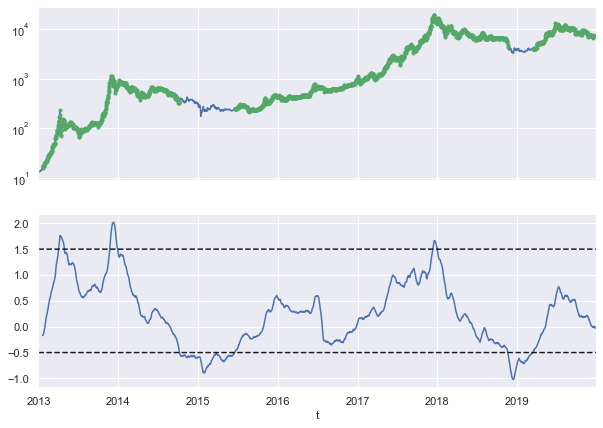

In [18]:
lb = pd.Series(-0.5,index = df.index)
ub = pd.Series(1.5,index = df.index)
f,a = plt.subplots(nrows = 2, sharex = True)
df['Close'].plot(ax = a[0],logy = True)
df['Close'].loc[df['log_puell_ma']>-0.5].plot(ax = a[0],style = 'g.')

df['log_puell_ma'].plot(ax = a[1])
lb.plot(ax = a[1],style = 'k--')
ub.plot(ax = a[1],style = 'k--')


In [ ]:
df